In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<span style="color: white">
<h3>Geometrische Verteilung:</h3>

Ein Bernourlli-Versuch werde bei gleichgebliebenden Wahrscheinlichkeiten $\pi = P(A)$ so lange wiederholt, bis zum ersten Mal das interessierende Ereignis A eintritt. Dann heißt die Zufallsvariable

$S =$ "Anzahl der Versuche, bis zum ersten Mal A eintritt"

geometrisch verteilt mit Parameter mit Parameter $\pi$, kurz $X ~ G(\pi)$. Der Träger von $X$ ist $\tau$ = ${1, 2, 3, ...} = \mathbb{N}$. Die Wahrscheinlichkeitsverteilung ist durch

$$P(X = x) = (1 - \pi)^{x-1}\pi$$

gegeben.

<i>~Quelle: Statistik - Der Weg zur Datenanalyse</i>

</span>

In [2]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
df.species.value_counts('normalize')

species
Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: proportion, dtype: float64

In [4]:
ps = []

for i in range(1000):
    count = 0
    for i in range(100):
        if df.species.sample(1).values[0] == 'Chinstrap':
            count += 1
    p = count / 100
    ps.append(p)
ps = np.array(ps)
p = round(np.average(ps), 3)
print(f"p = {p}")

p = 0.2


<span style="color: white">
<h3>Wahrscheinlichkeitsverteilung:</h3>

<h4>Formel Herleitung:</h4>

Sagen wir mal dass wir $10$ Versuche gebraucht haben, bis zum ersten Mal A eintritt, davor hatten wir das Ereignis $P(\bar{A})$, dann laut der bedingten Wahrscheinlichkeit können wie $P(A)$ wie folgt bestimmen:</text>

$$\Rightarrow P(X = x) = P(\bar{A})\,P(\bar{A})\, \ldots P(\bar{A})\,P(A)$$

$P(\bar{A})$ ist $(x - 1)$ mal

$$\Rightarrow P(X = x) = P(\bar{A})^{x-1}P(A)$$

$$\Rightarrow \boxed{P(X = x) = (1 - \pi)^{x - 1}\pi}$$

<h4>Grenzwert Berechnen:</h4>
Das ist auch eine geometrische Folge mit der Formel:

$$a_n = \pi (1 - \pi)^{n - 1} \quad \text{wobei} \quad n \in X$$

$$\lim_{n \to \infty} a_n = \pi \, lim_{n \to \infty}(1 - \pi)^{n - 1}$$

$$\therefore \lim_{n \to \infty} r^n = 0 \quad \text{wenn} \quad \left| r \right| < 1$$

$$\Rightarrow \boxed{\lim_{n \to \infty} a_n = 0} \quad \text{weil} \quad 0 < 1 - \pi < 1$$

d.h. in einer geometrichen Verteilung, die $P(A)$ nähert sich an 0, als x zu unendlich geht. Hier sieht man auch, dass diese Folge monoton fallend ist, d.h. der großte Wert von $P(A)$ ist immer bei $x = 1$, und mit jeden weitern $x$, wird $P(A)$ verkleinert.

<h4>Beispiel:</h4>
Hier wollen wir die Wahrscheinlichkeiten für unseres Beispiel "Chinstrap" für erste 15 Versuche bestimmen:

$$P(A) = π = 0.197$$

$$P(X = x) = (1 - \pi)^{x-1} \pi$$

z.B. für $x = 2$:
$$\Rightarrow P(X = 2) = (1 - \pi)^{2-1} \pi$$
$$\Rightarrow P(X = 2) = (1 - 0.2) \, 0.2$$
$$\Rightarrow \boxed{P(X = 2) = 0.16}$$

</span>

In [19]:
#Wahrscheinlichkeiten bestimmen für x = 1 bis 15

x = 15
P_Xs = []
F_Xs = []
for i in range(1, x+1):
    P_X = ((1 - p) ** (i - 1)) * p
    P_Xs.append(round(P_X, 2))

    F_X = 1 - (1 - p) ** (i)
    F_Xs.append(round(F_X, 2))

for i, P_X in enumerate(P_Xs, 1):
    print(f"P(X={i}) = {P_X}")

P(X=1) = 0.2
P(X=2) = 0.16
P(X=3) = 0.13
P(X=4) = 0.1
P(X=5) = 0.08
P(X=6) = 0.07
P(X=7) = 0.05
P(X=8) = 0.04
P(X=9) = 0.03
P(X=10) = 0.03
P(X=11) = 0.02
P(X=12) = 0.02
P(X=13) = 0.01
P(X=14) = 0.01
P(X=15) = 0.01


<span style="color: white">

hier haben die Wahrscheinlichkeit beim <i>1.</i> Versuch $0.2$, beim <i>2.</i> Versuch $0.16$, usw. bis zum $0.01$ beim <i>15.</i> Versuch.

</span>

<span style="color: white">

<h3>Verteilungsfunktion</h3>

Verteilung ist die kumulative Summe von $P(X)$ bis ein bestimmtes $x$.

$$F(X) = P(X \leq x) = P(X=1) \, + \, P(X+2) \, + \, \ldots \, + \, P(X=x)$$

$$\Rightarrow F(X) = (1 - \pi)^0 \, \pi \, + \, (1 - \pi)^1 \, \pi \, + \, \cdots \, + \, (1 - \pi)^{x-1} \, \pi$$

$$\Rightarrow \boxed{F(X) = \pi \, \sum_{k=0}^{x-1} \, (1 - \pi)^k}$$

<h4>Grenzwert Berechnen:</h4>
Das ist eine geometrische Reihe mit der Formel:

$$\therefore \sum_{n=0}^{k} \, q^n = \frac{1 - q^{k+1}}{1 - q}$$

$$\Rightarrow F(X) = \pi \, \left(\frac{1 - (1 - \pi)^{x-1+1}}{1 - (1 - \pi)}\right)$$

$$\Rightarrow \boxed{F(X) = P(X \leq x) = 1 - (1 - \pi)^x}$$

Das ist auch eine geometrische Folge mit der Formel:

$$s_n = 1 - (1 - \pi)^n \quad \text{wobei} \quad n \in X$$

$$\lim_{n \to \infty} s_n = 1 - \lim_{n \to \infty}(1 - \pi)^n$$

$$\therefore \lim_{n \to \infty} r^n = 0 \quad \text{wenn} \quad \left| r \right| \leq 1$$

$$\Rightarrow \boxed{\lim_{n \to \infty} s_n = 1}$$

d.h. diese Verteilungsfunktion würde gegen 1 konvergieren, wenn n zu unendlich geht.

Die beide Grenzwerte 0 und 1 sind der Beweis, dass $\pi$ kann nur die Werte zwischen 0 und 1 annehmen kann.

<h4>Beispiel:</h4>
Hier wollen wir die kumulative Summanten der Wahrscheinlichkeiten berechnen.

z.B. für $x = 2$:
$$ F(X) = P(X \leq x) = 1 - (1 - \pi)^x$$

$$\Rightarrow F(X) = 1 - (1 - 0.2)^2$$
$$\Rightarrow F(X) = 1 - (0.8)^2$$
$$\Rightarrow \boxed{F(X) = 0.36}$$
</span>

In [ ]:
for i, F_X in enumerate(F_Xs, 1):
    print(f"P(X<={i}) = {F_X}")

F(X<=1) = 0.2
F(X<=2) = 0.36
F(X<=3) = 0.49
F(X<=4) = 0.59
F(X<=5) = 0.67
F(X<=6) = 0.74
F(X<=7) = 0.79
F(X<=8) = 0.83
F(X<=9) = 0.87
F(X<=10) = 0.89
F(X<=11) = 0.91
F(X<=12) = 0.93
F(X<=13) = 0.95
F(X<=14) = 0.96
F(X<=15) = 0.96


<span style="color: white">

<h3>Erwartungswert</h3>



$$E(X) =  \frac{1}{P(A)}$$

Bsp: Bei einem Würfelwurf ist der Erwartungswert, dass das erste Mal ein 2 (oder irgendeine andere Nummer aus $\Omega$) eintritt ist:
$$E(X = 2) = \frac{1}{\frac{1}{6}} = 6$$

weil $P(A) = {\Large \frac{1}{6}}$ für jedes $\Large \omega$ 

</span>

In [7]:
E_X = round(1 / p, 2)
print(f"E(X) = {E_X}")

E(X) = 5.0


<span style="color: white">

<h3>Median</h3>

$$x = F(X) ≥ 0.5$$

</span>

In [8]:
for F in F_Xs:
    if F >= 0.5:
        median = F_Xs.index(F) + 1
        break
print(f"Median = {median}")

Median = 4


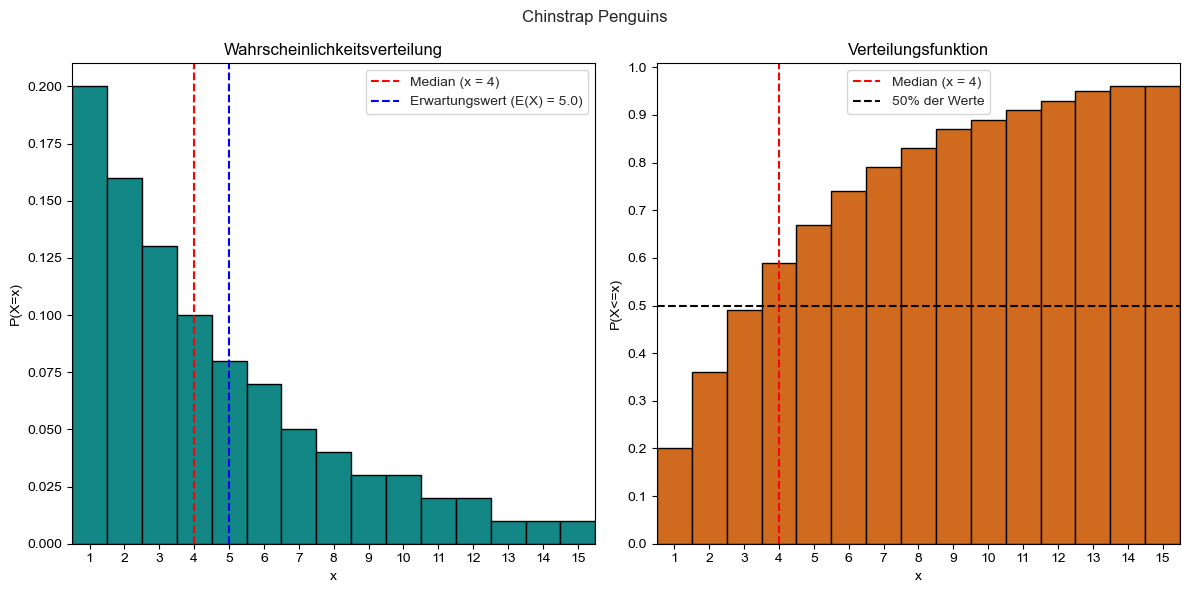

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.set_style('ticks')
sns.barplot(x=np.arange(1, 16), y=P_Xs, ax=ax[0], color='#009999', edgecolor='black', width=1.0)
sns.barplot(x=np.arange(1, 16), y=F_Xs, ax=ax[1], color='#EC6602', edgecolor='black', width=1.0)
ax[0].set_title('Wahrscheinlichkeitsverteilung')
ax[1].set_title('Verteilungsfunktion')
ax[0].set_xlabel('x')
ax[0].set_ylabel('P(X=x)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('P(X<=x)')
ax[0].axvline(x=median - 1, color='r', linestyle='--', label=f'Median (x = {median})')
ax[0].axvline(x=E_X - 1, color='b', linestyle='--', label=f'Erwartungswert (E(X) = {E_X})')
ax[1].axvline(x=median - 1, color='r', linestyle='--', label=f'Median (x = {median})')
ax[1].axhline(y=0.5, color='black', linestyle='--', label=f'50% der Werte')
ax[0].legend()
ax[1].legend()
ax[1].set_yticks(np.arange(0, 1.1, 0.1))
fig.suptitle('Chinstrap Penguins')
plt.tight_layout()
plt.show();

In [10]:
chinstrap_occ = []
position = 0
i = 0
while i < 100:
    position += 1
    if df.species.sample(1).values[0] == 'Chinstrap':
        chinstrap_occ.append(position)
        position = 0
        i += 1
chinstrap_occ = np.array(chinstrap_occ)
avg = round(np.average(chinstrap_occ), 2)
print(f"Mittelwert = {avg}")

Mittelwert = 5.2
